## Student's Maths Performance Predictor

In [1]:
import pandas as pd

In [2]:
student = pd.read_csv('data.csv')

In [3]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
student['Dalc'].value_counts()

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

In [6]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# student.hist(bins=50, figsize=(20,15))   #for plotting

## Train-Test Splitting

In [9]:
import numpy as np

In [10]:
#Splitting using normal method:
# def split_train_set(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
# #     print(shuffled)  #to view shuffled data
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_set(student, 0.2)
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [12]:
#Splitting using Sklearn:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(student, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 316
Rows in test set: 79


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(student, student['Dalc']):
    strat_train_set = student.loc[train_index]
    strat_test_set = student.loc[test_index]

In [14]:
strat_train_set['Dalc'].value_counts()

1    221
2     60
3     21
4      7
5      7
Name: Dalc, dtype: int64

In [15]:
strat_test_set['Dalc'].value_counts()

1    55
2    15
3     5
4     2
5     2
Name: Dalc, dtype: int64

In [16]:
student = strat_train_set.copy()

## Looking for Correlations

In [17]:
corr_matrix = student.corr()

In [18]:
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.907425
G1            0.797387
Medu          0.229405
Fedu          0.141012
studytime     0.097704
famrel        0.030813
absences      0.028995
freetime     -0.007772
health       -0.027671
Dalc         -0.074626
Walc         -0.091643
traveltime   -0.099372
goout        -0.147678
age          -0.216514
failures     -0.400005
Name: G3, dtype: float64

array([[<AxesSubplot:xlabel='G3', ylabel='G3'>,
        <AxesSubplot:xlabel='G2', ylabel='G3'>,
        <AxesSubplot:xlabel='G1', ylabel='G3'>,
        <AxesSubplot:xlabel='failures', ylabel='G3'>],
       [<AxesSubplot:xlabel='G3', ylabel='G2'>,
        <AxesSubplot:xlabel='G2', ylabel='G2'>,
        <AxesSubplot:xlabel='G1', ylabel='G2'>,
        <AxesSubplot:xlabel='failures', ylabel='G2'>],
       [<AxesSubplot:xlabel='G3', ylabel='G1'>,
        <AxesSubplot:xlabel='G2', ylabel='G1'>,
        <AxesSubplot:xlabel='G1', ylabel='G1'>,
        <AxesSubplot:xlabel='failures', ylabel='G1'>],
       [<AxesSubplot:xlabel='G3', ylabel='failures'>,
        <AxesSubplot:xlabel='G2', ylabel='failures'>,
        <AxesSubplot:xlabel='G1', ylabel='failures'>,
        <AxesSubplot:xlabel='failures', ylabel='failures'>]], dtype=object)

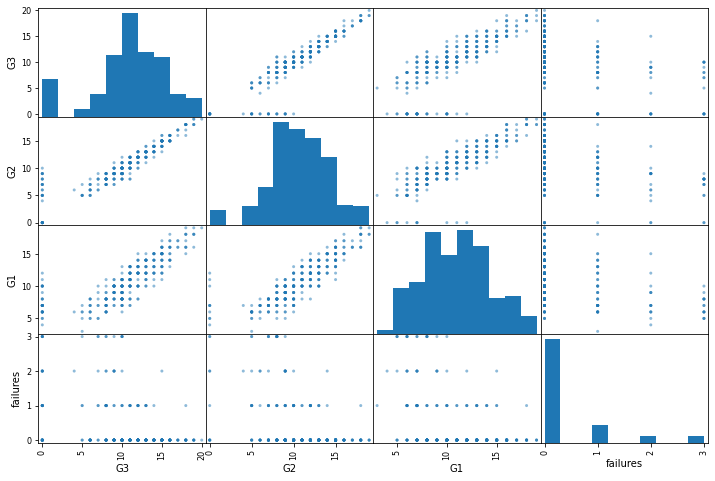

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["G3","G2","G1","failures"]
scatter_matrix(student[attributes], figsize=(12,8))

In [20]:
student = strat_train_set.drop("G3", axis=1)
student_test_set = strat_test_set
student_labels = strat_train_set["G3"].copy()

## Dropping Attributes

In [21]:
#dropping out str data columns
student = student.drop(["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"
], axis=1)
student.shape

(316, 15)

In [22]:
student_test_set = student_test_set.drop(["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"
], axis=1)
student_test_set.shape

(79, 16)

## Creating a Pipeline

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                       ('std_scaler', StandardScaler()),])

In [24]:
student_num_tr = my_pipeline.fit_transform(student)

In [25]:
student_num_tr.shape

(316, 15)

## Selecting a desired model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()  #model 1
# model = DecisionTreeRegressor()  #model 2
model = RandomForestRegressor() #model 3
model.fit(student_num_tr, student_labels)

RandomForestRegressor()

In [27]:
some_data = student.iloc[:5]
some_labels = student_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(some_data)

C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([18.83, 18.87, 18.86, 18.87, 18.86])

In [28]:
list(some_labels)

[7, 0, 15, 0, 5]

##  Evaluating the model

In [29]:
from sklearn.metrics import mean_squared_error
student_predictions = model.predict(student_num_tr)
mse = mean_squared_error(student_labels, student_predictions)
rmse = np.sqrt(mse)

In [30]:
rmse

0.5948207367440711

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, student_num_tr, student_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [32]:
rmse_scores

array([1.42565226, 1.25262599, 1.66855757, 1.24457448, 1.37181563,
       1.20435667, 1.00591477, 2.61142712, 1.29417429, 1.45337316])

In [33]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())


In [34]:
print_scores(rmse_scores)

Scores:  [1.42565226 1.25262599 1.66855757 1.24457448 1.37181563 1.20435667
 1.00591477 2.61142712 1.29417429 1.45337316]
Mean:  1.4532471950237438
Standard Deviation:  0.4202715849007344


## saving the model

In [35]:
from joblib import dump, load
dump(model,'Student.joblib')

['Student.joblib']

## Testing the model

In [36]:
X_test = student_test_set.drop('G3', axis=1)
Y_test = student_test_set['G3'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[11.02  6.13  5.65  9.99 11.92 12.32 18.48 14.09  8.92 15.39  9.44  0.77
 10.99 12.16 12.17  5.86  9.49  7.1  16.05 12.14 13.03 13.67  6.56 10.41
 14.53  7.35 10.99 11.58 15.51 18.13 10.06 10.5  15.59 17.31  1.57 11.14
 12.64  9.98 14.   12.92 16.    5.99  7.46 14.08 15.52 10.3   5.67  9.53
  9.61  7.94  1.55  8.58 10.87 13.73 12.93  2.74  8.22 14.19  9.82  8.03
 10.15  9.4  12.74 11.79  4.51 16.25 12.7   8.01 15.25  1.44  6.21 14.99
 12.18  0.28 13.95  5.84 11.57 12.41  9.99] [11, 6, 8, 10, 11, 13, 18, 14, 10, 16, 8, 0, 10, 11, 13, 5, 8, 7, 16, 11, 13, 13, 6, 11, 13, 7, 10, 11, 17, 18, 10, 10, 15, 18, 0, 12, 14, 10, 14, 12, 17, 6, 6, 14, 15, 11, 0, 9, 10, 8, 0, 8, 12, 14, 13, 8, 9, 13, 10, 8, 11, 8, 14, 11, 0, 15, 11, 8, 15, 0, 0, 15, 14, 0, 14, 5, 11, 12, 10]


In [37]:
final_rmse

1.5009191276841338

In [40]:
prepared_data[0]

array([-0.57201173,  1.1835779 ,  1.35995362, -0.64778173, -0.0226591 ,
       -0.46920898, -0.00375032, -2.31580313, -0.14331102,  1.72222315,
        2.06610325,  1.01897618,  1.52360967, -0.85315279, -1.26069783])